In [1]:
import jsonlines
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams["font.size"] = 14

sessions = pd.read_json("../data/datahub_sessions.jsonl", lines=True)
sessions.head()

,action,timestamp,user
0,start,2019-07-09 12:00:00,0284654d2019df7e37c9a9cbd03ab568eec1815efc2bec...
1,start,2019-07-09 12:00:00,7bee9fde455eb141a9e8d1512579f633e8b14ceb5fc745...
2,start,2019-07-09 13:00:00,34882eac8231d42507374f54bd154230d9211cf2be0de7...
3,start,2019-07-09 13:00:00,26325d454e9e6c2b872d3c7bb39ca8132ad959d43af7ff...
4,start,2019-07-09 13:00:00,1ea6eb8e8511d4a7af81d63cf50b7fd546546328672f87...


In [7]:
sessions.shape

(239051, 4)

In [2]:
sessions["month"] = sessions["timestamp"].map(lambda t: t.month)
sessions.head()

,action,timestamp,user,month
0,start,2019-07-09 12:00:00,0284654d2019df7e37c9a9cbd03ab568eec1815efc2bec...,7
1,start,2019-07-09 12:00:00,7bee9fde455eb141a9e8d1512579f633e8b14ceb5fc745...,7
2,start,2019-07-09 13:00:00,34882eac8231d42507374f54bd154230d9211cf2be0de7...,7
3,start,2019-07-09 13:00:00,26325d454e9e6c2b872d3c7bb39ca8132ad959d43af7ff...,7
4,start,2019-07-09 13:00:00,1ea6eb8e8511d4a7af81d63cf50b7fd546546328672f87...,7


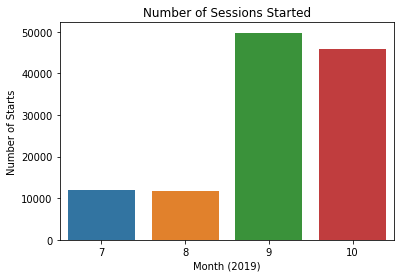

In [3]:
sns.barplot(x="month", y="action", 
            data=sessions[sessions["action"] == "start"].groupby("month").count().reset_index())
plt.title("Number of Sessions Started")
plt.xlabel("Month (2019)")
plt.ylabel("Number of Starts")
plt.savefig("../figures/nb02-num-sessions-started.png")

In [23]:
starts_and_stops = (sessions
                    .groupby(["user", "action"])
                    .count()
                    .reset_index()
                    .pivot("user", "action", "timestamp")
                    .reset_index())
starts_and_stops["breaks"] = starts_and_stops["start"] - starts_and_stops["stop"]
breaks = starts_and_stops[starts_and_stops["breaks"] > 0]
breaks.head()

action,user,start,stop,breaks
37,01306c8de25f93c4329f16844060ac9e91cdf411a78fb2...,11.0,10.0,1.0
51,019a84362adc3aa8081dda5e69b109c23fa5ac3277992f...,5.0,4.0,1.0
68,020c4ec4aeb4405753df2464609e64f7bd72332dff429b...,3.0,2.0,1.0
73,02384af4d44fbd8fe781f086484fe37b4fab947ed2d267...,39.0,37.0,2.0
74,0239293efd860e22a43b389e5d930f277e7398bc3671b0...,41.0,39.0,2.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


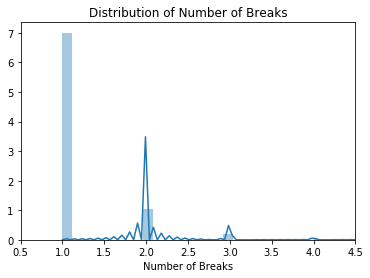

In [33]:
sns.distplot(breaks["breaks"], bins=50)
plt.xlim([.5,4.5])
plt.xlabel("Number of Breaks")
plt.title("Distribution of Number of Breaks");